# Reconhecimento Facial usando DeepLearning

## Preparando Ambiente

In [1]:
!pip install --upgrade opencv-python
!pip install --upgrade dlib

Requirement already up-to-date: opencv-python in /usr/local/lib/python3.6/dist-packages (4.1.0.25)
Requirement already up-to-date: dlib in /usr/local/lib/python3.6/dist-packages (19.17.0)


## Importando bibliotecas e criando funções

In [0]:
import cv2
import dlib
import numpy as np

from IPython.display import display, Javascript, Image, clear_output
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
import urllib

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  resp = urllib.request.urlopen(data)
  image = np.asarray(bytearray(resp.read()), dtype="uint8")
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)

  return image

## Obtendo arquivo com pesos já treinados

In [3]:
!wget http://arunponnusamy.com/files/mmod_human_face_detector.dat

--2019-05-17 21:23:04--  http://arunponnusamy.com/files/mmod_human_face_detector.dat
Resolving arunponnusamy.com (arunponnusamy.com)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to arunponnusamy.com (arunponnusamy.com)|185.199.108.153|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.arunponnusamy.com/files/mmod_human_face_detector.dat [following]
--2019-05-17 21:23:04--  https://www.arunponnusamy.com/files/mmod_human_face_detector.dat
Resolving www.arunponnusamy.com (www.arunponnusamy.com)... 185.199.110.153, 185.199.109.153, 185.199.111.153, ...
Connecting to www.arunponnusamy.com (www.arunponnusamy.com)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 729940 (713K) [application/octet-stream]
Saving to: ‘mmod_human_face_detector.dat.4’

mmod_human_face_det 100%[===================>] 712.83K  --.-KB/s    in 0.05s   

2019-05-17 21:23:05 (13.2 MB/s) - ‘mmod_human_face_de

## Executando o reconhecimento

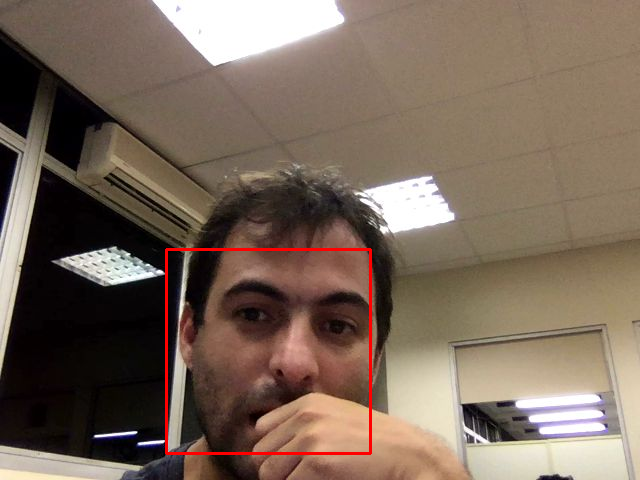

<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored

In [4]:
face_weights = 'mmod_human_face_detector.dat'
scale = 4

# Inicializa a rede com os pesos previamente aprendidos
cnn_face_detector = dlib.cnn_face_detection_model_v1(face_weights)

while True:
    
    # Captura um simples frame (bate uma foto)
    frame = take_photo()

    # Detecção de faces usando Convolutional Neural Networks (cnn)
    faces_cnn = cnn_face_detector(frame, 1)

    # Desenhando retângulo sobre as faces
    for face in faces_cnn:
        x = face.rect.left()
        y = face.rect.top()
        w = face.rect.right() - x
        h = face.rect.bottom() - y

        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)
        
    clear_output()
    # Exibindo o resultado
    cv2_imshow(frame)
